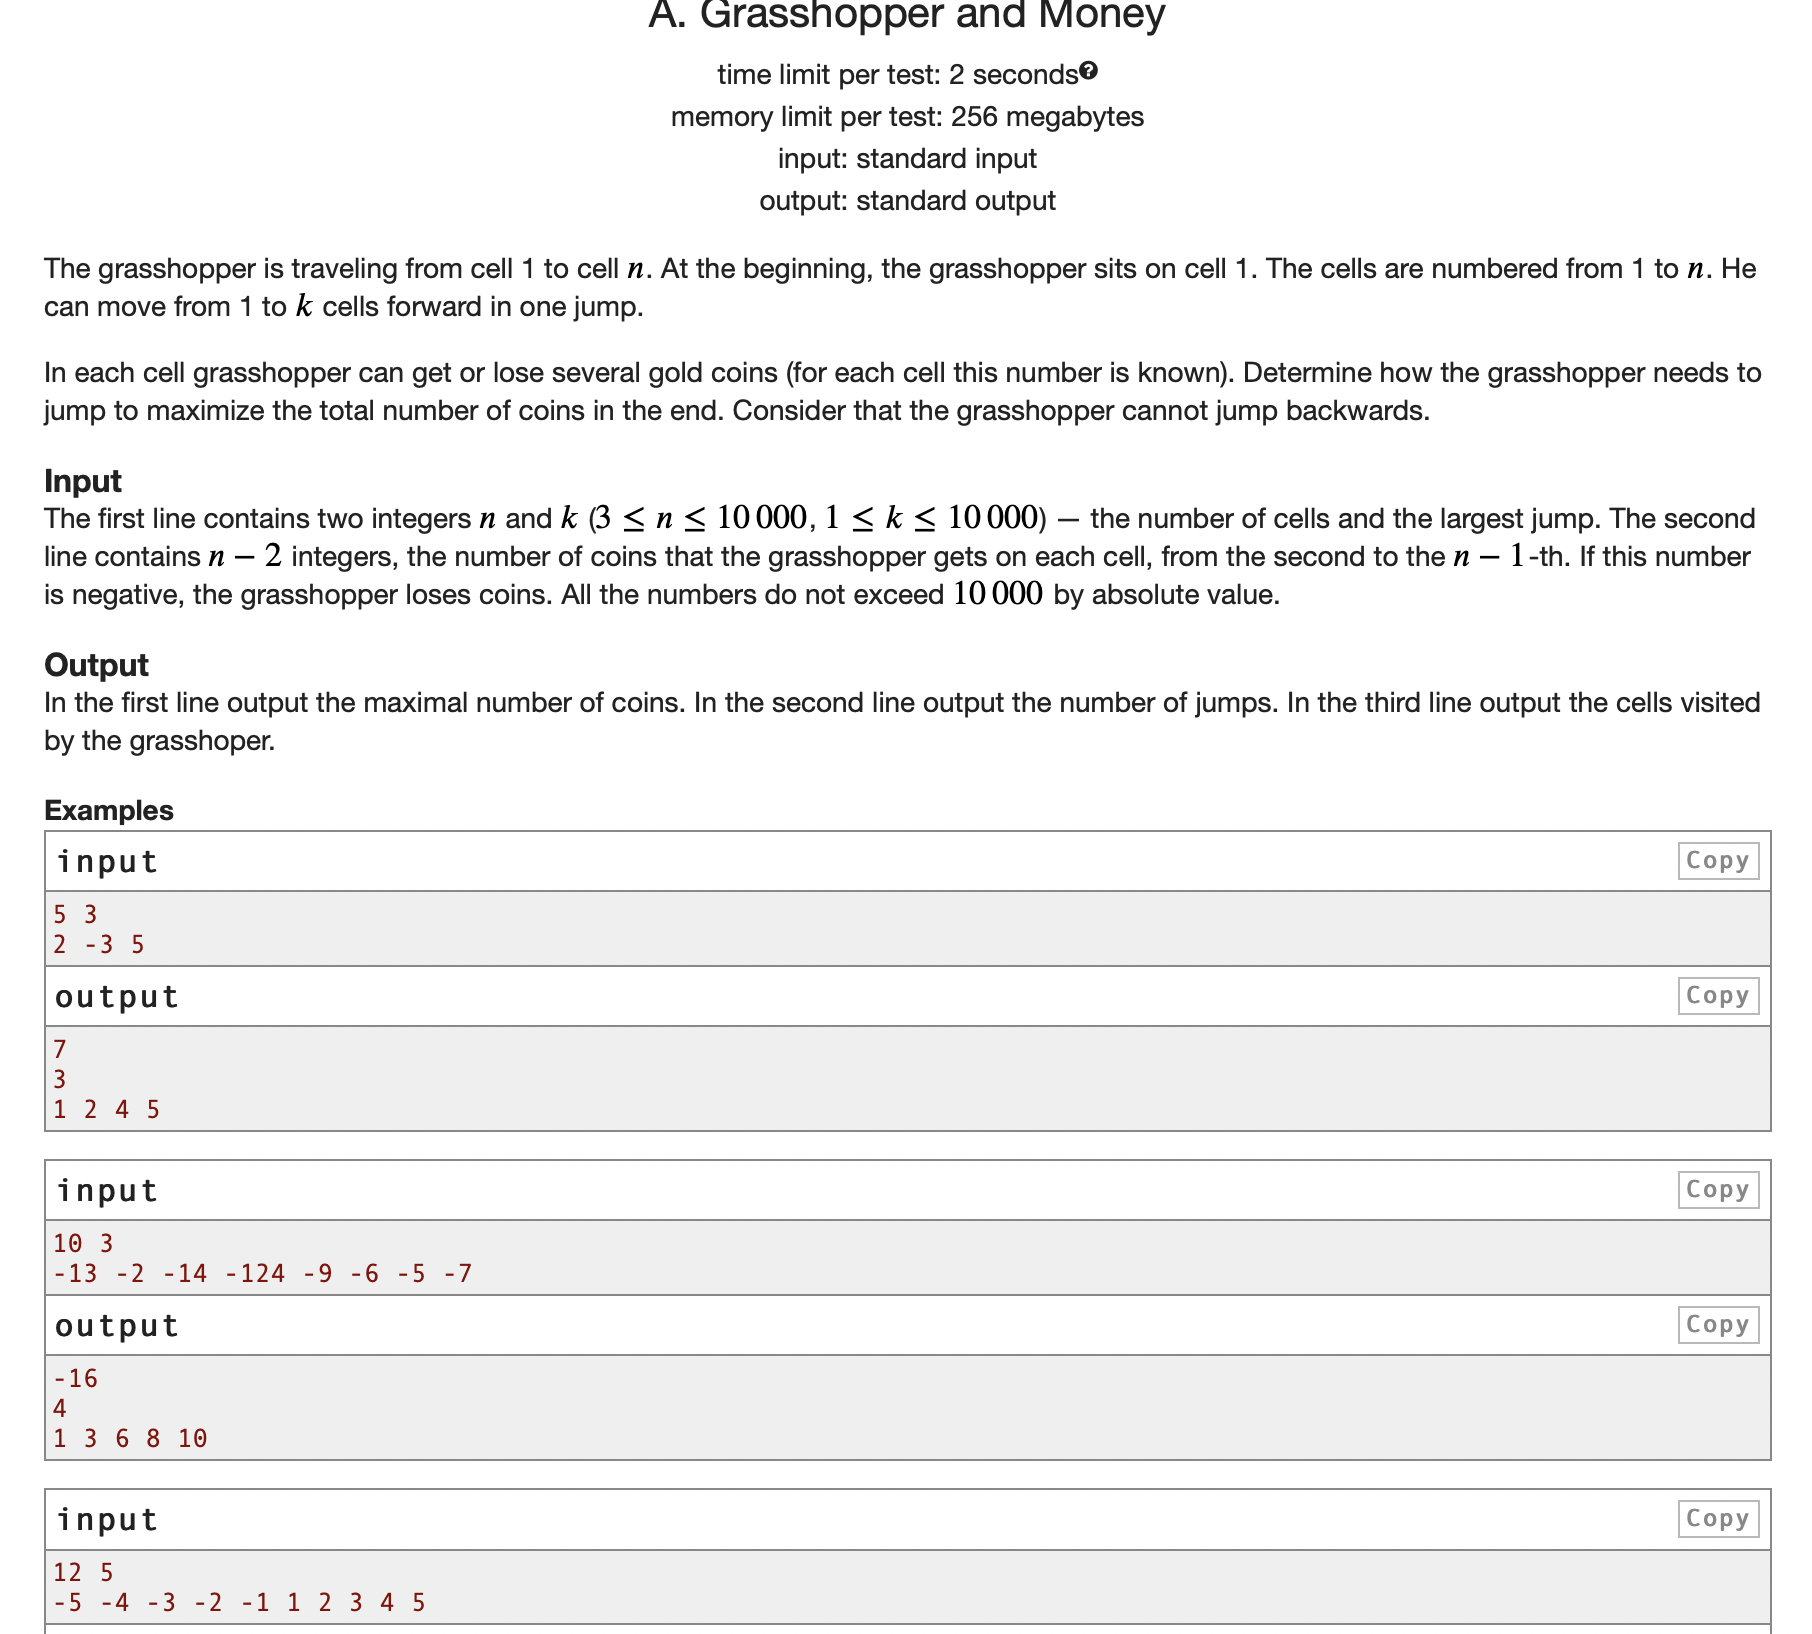|

In [61]:
class Grasshoper:
    def __init__(self, n, max_jump, field):
        self.n = n
        self.max_jump = max_jump
        self.field = field

    def get_best_path(self):
        history_gold = [0] + self.field + [0]
        history_prev_cell = [0] * self.n
        for i in range(1, self.n):
            best_prev_cell = i - 1
            for j in range(1, min(i, self.max_jump) + 1):
                if history_gold[i - j] > history_gold[best_prev_cell]:
                    best_prev_cell = i - j
            history_gold[i] += history_gold[best_prev_cell]
            history_prev_cell[i] = best_prev_cell

        current_cell = self.n - 1
        path = [current_cell + 1]
        while current_cell != 0:
            current_cell = history_prev_cell[current_cell]
            path.append(current_cell + 1)
        return history_gold[-1], len(path) - 1, path[::-1]


n, k = list(map(int, input().split()))
arr = list(map(int, input().split()))
result = Grasshoper(n, k, arr).get_best_path()
print(result[0])
print(result[1])
print(*result[2])

In [62]:
tests = [
    (5, 3, [2, -3, 5]),
    (10, 3, [-13, -2, -14, -124, -9, -6, -5, -7]),
    (12, 5, [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5])
]
expected = [ 
    (7, 3, [1, 2, 4, 5]),
    (-16, 4, [1, 3, 6, 8, 10]),
    (14, 7, [1, 6, 7, 8, 9, 10, 11, 12])
]

for test, expect in zip(tests, expected):
    grasshoper = Grasshoper(*test)
    for actual, exp in zip(grasshoper.get_best_path(), expect):
        assert actual == exp

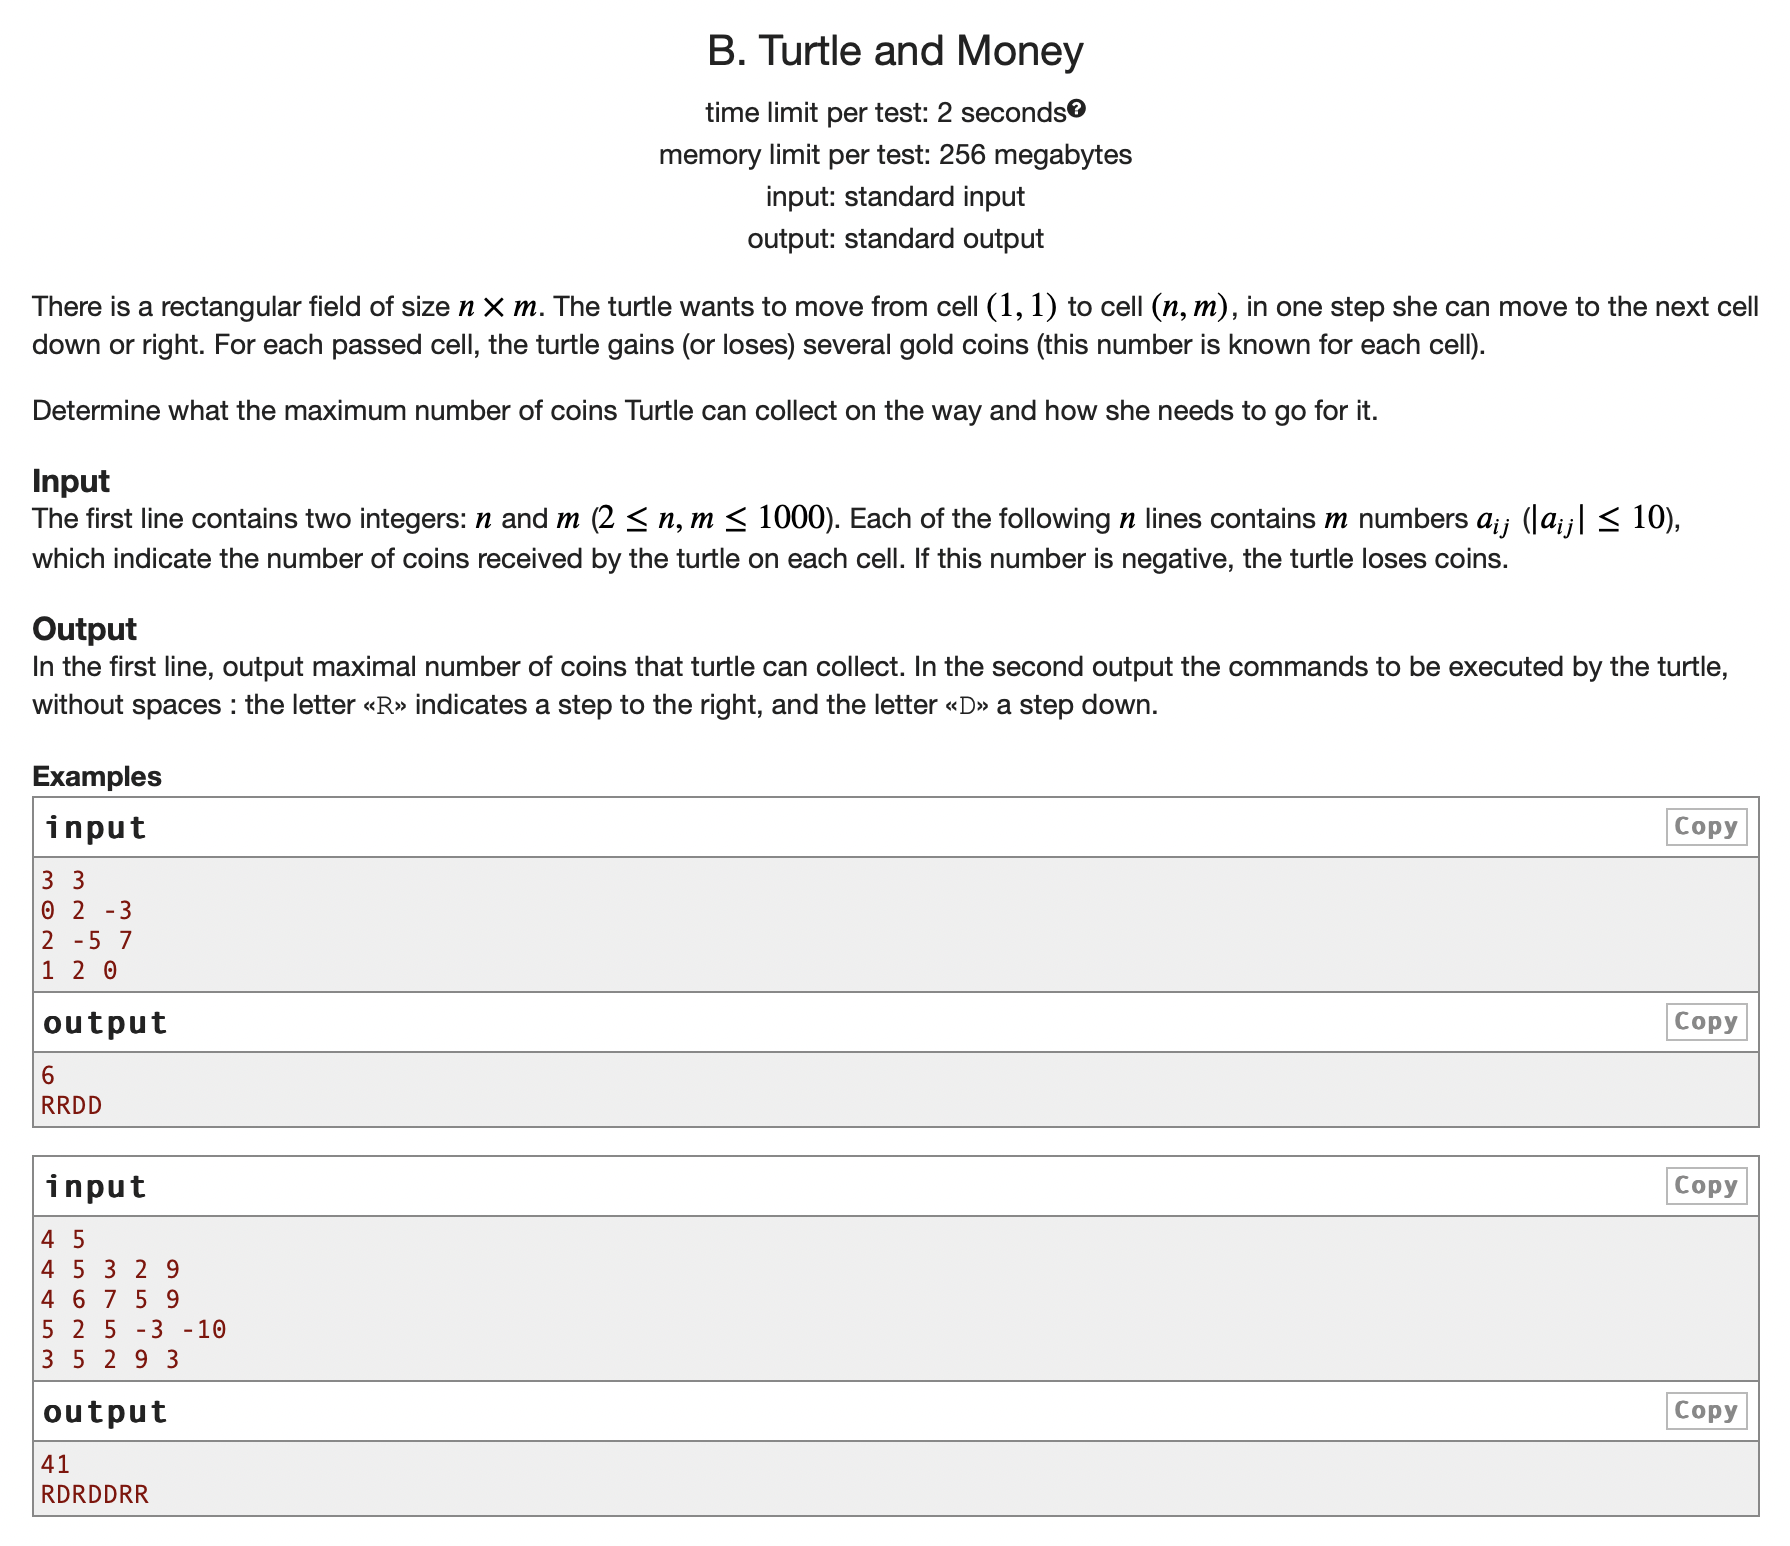

In [63]:
class Turtle:
    def __init__(self, n, m, field):
        self.n = n
        self.m = m
        self.field = field

    def get_best_path(self):
        history_gold = self._init_history_gold()
        history_prev_cell = [[0] * (self.m + 1) for _ in range(self.n + 1)]
        for i in range(1, self.n + 1):
            for j in range(1, self.m + 1):
                if i == 1 and j == 1:
                    continue
                if history_gold[i - 1][j] > history_gold[i][j - 1]:
                    history_gold[i][j] += history_gold[i - 1][j]
                    history_prev_cell[i][j] = (i - 1, j)
                else:
                    history_gold[i][j] += history_gold[i][j - 1]
                    history_prev_cell[i][j] = (i, j - 1)
                    
        current_cell = (self.n, self.m)
        new_cell = current_cell
        path = []
        while not(current_cell[0] == 1 and current_cell[1] == 1):
            new_cell = history_prev_cell[current_cell[0]][current_cell[1]]
            if new_cell[0] < current_cell[0]:
                path.append('D')
            else:
                path.append('R')
            current_cell = new_cell
        return history_gold[self.n][self.m], path[::-1]

    def _init_history_gold(self):
        history_gold = [[-float('inf')] * (self.m + 1)]
        for i in range(self.n):
            history_gold.append([-float('inf')] + self.field[i])
        return history_gold


n, m = list(map(int, input().split()))
arr = [list(map(int, input().split())) for _ in range(n)]
result = Turtle(n, m, arr).get_best_path()
print(result[0])
print(''.join(result[1]))

In [64]:
tests = [
    (3, 3, [[0, 2, -3], [2, -5, 7], [1, 2, 0]]),
    (4, 5, [[4, 5, 3, 2, 9], [4, 6, 7, 5, 9], [5, 2, 5, -3, -10], [3, 5, 2, 9, 3]]),
]
expected = [ 
    (6, ['R','R','D','D']),
    (41, ['R','D','R','D','D','R','R']),
]

for test, expect in zip(tests, expected):
    turtle = Turtle(*test)
    for actual, exp in zip(turtle.get_best_path(), expect):
        assert actual == exp

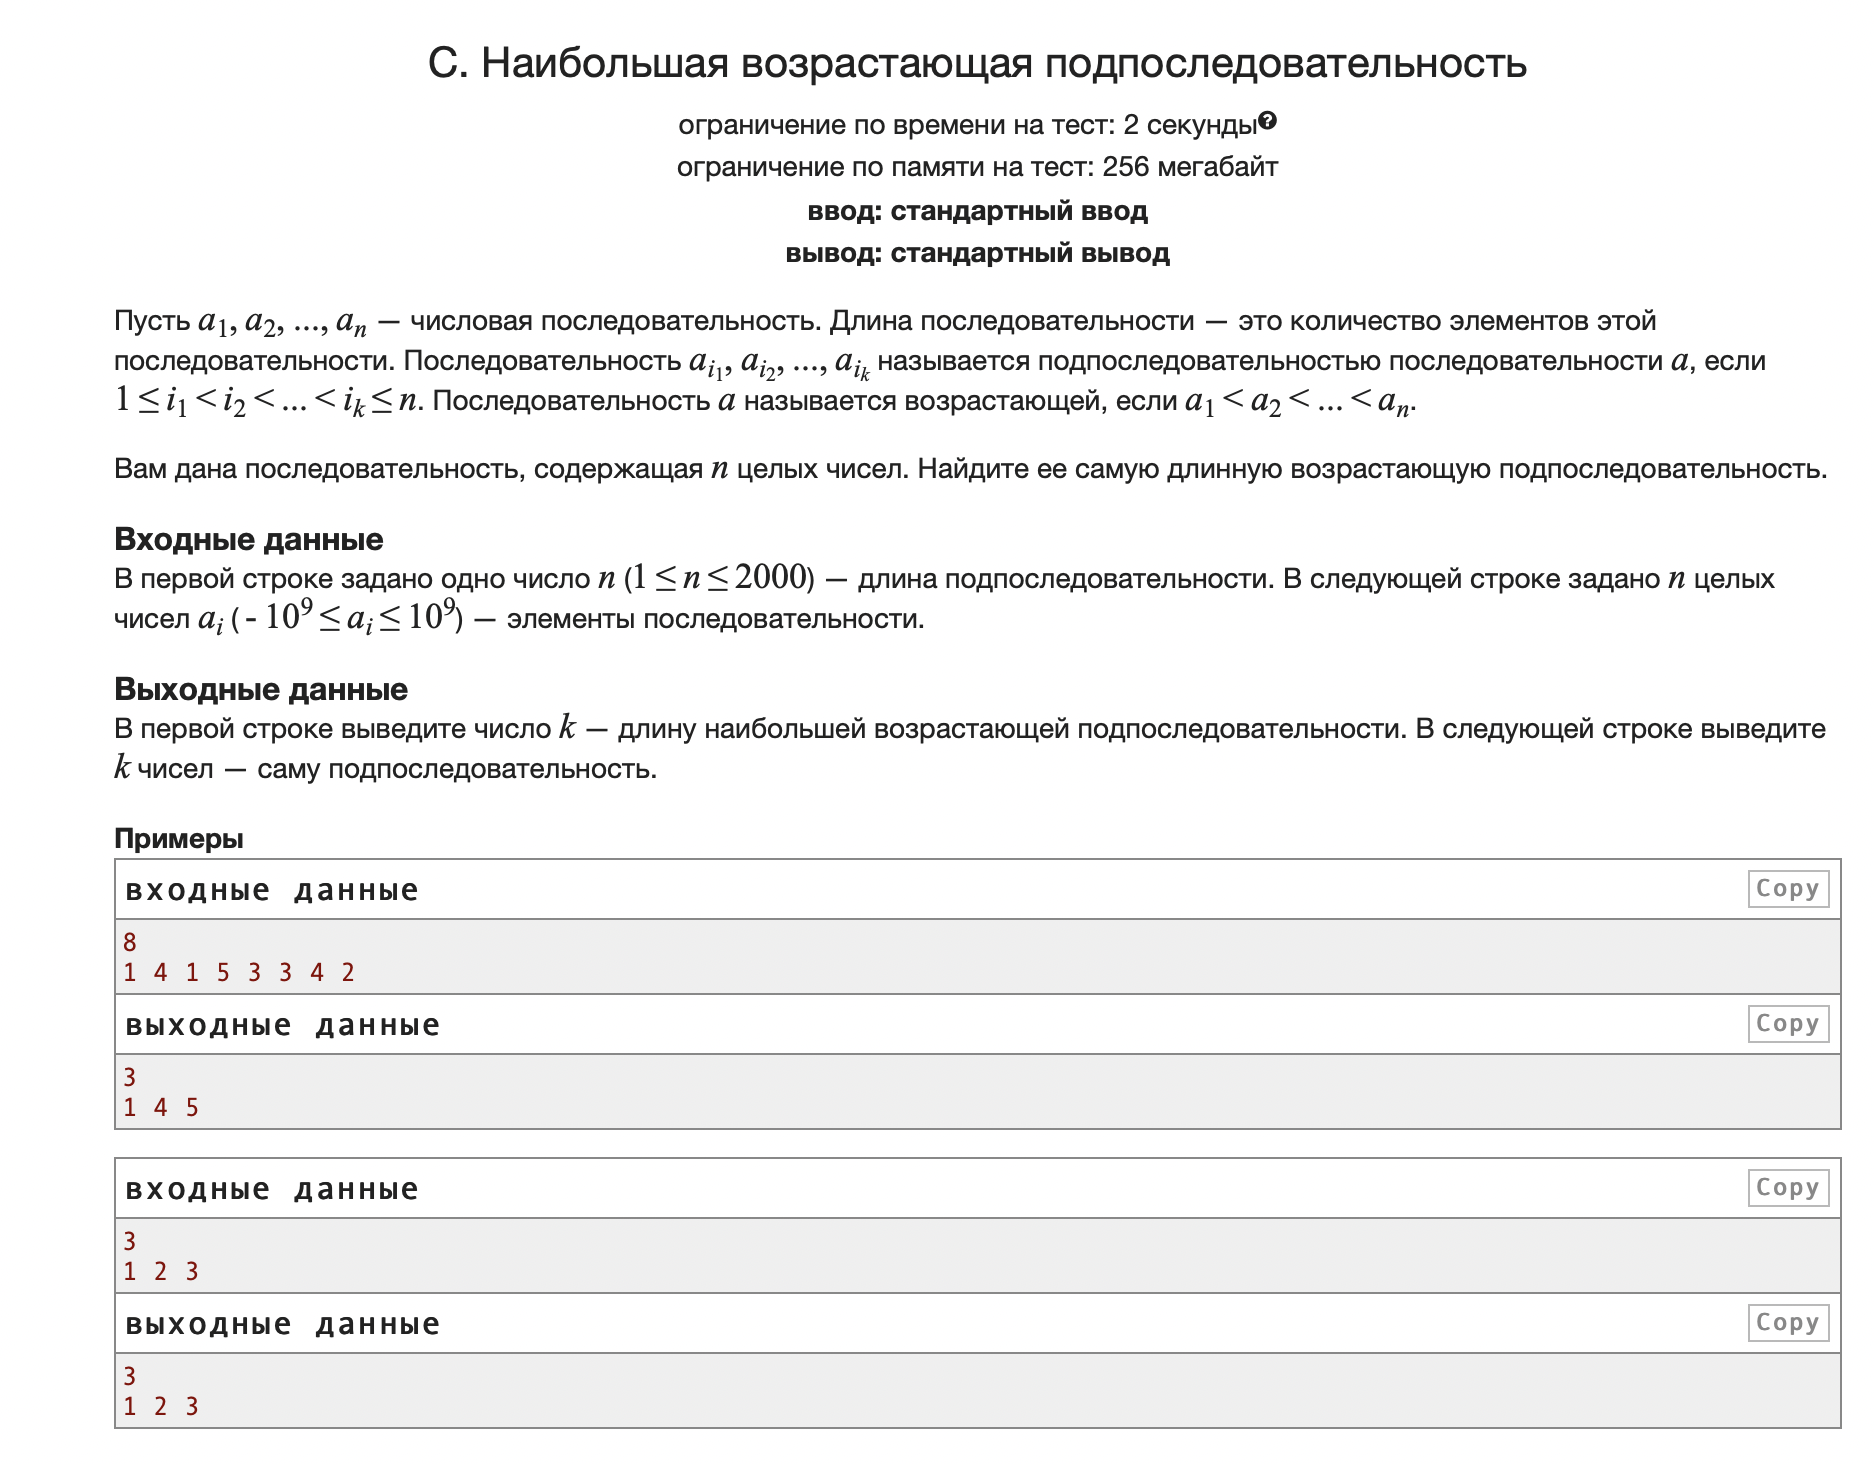

In [59]:
def get_longest_increaing_sequence(arr):
    lengths = [0] * len(arr)
    added_history = [0] * len(arr)
    for i in range(len(arr)):
        max_indx = i
        for j in range(i):
            if arr[j] < arr[i] and lengths[j] > lengths[max_indx]:
                max_indx = j
        lengths[i] = lengths[max_indx] + 1
        added_history[i] = max_indx

    max_ind = 0
    for i in range(len(lengths)):
        if lengths[i] > lengths[max_ind]:
            max_ind = i

    current_indx = max_ind
    sequence = [arr[current_indx]]
    while lengths[current_indx] != 1:
        current_indx = added_history[current_indx]
        sequence.append(arr[current_indx])

    return lengths[max_ind], sequence[::-1]


_ = input()
arr = list(map(int, input().split()))
result = get_longest_increaing_sequence(arr)
print(result[0])
print(*result[1])

8
1 4 1 5 3 3 4 2
3
1 4 5


In [56]:
tests = [
    (8, [1, 4, 1, 5, 3, 3, 4, 2]),
    (3, [1, 2, 3]),
    (3, [3, 2, 1])
]
expected = [ 
    (3, [1, 4, 5]),
    (3, [1, 2, 3]),
    (1, [3])
]

for test, expect in zip(tests, expected):
    for actual, exp in zip(get_longest_increaing_sequence(test[1]), expect):
        assert actual == exp

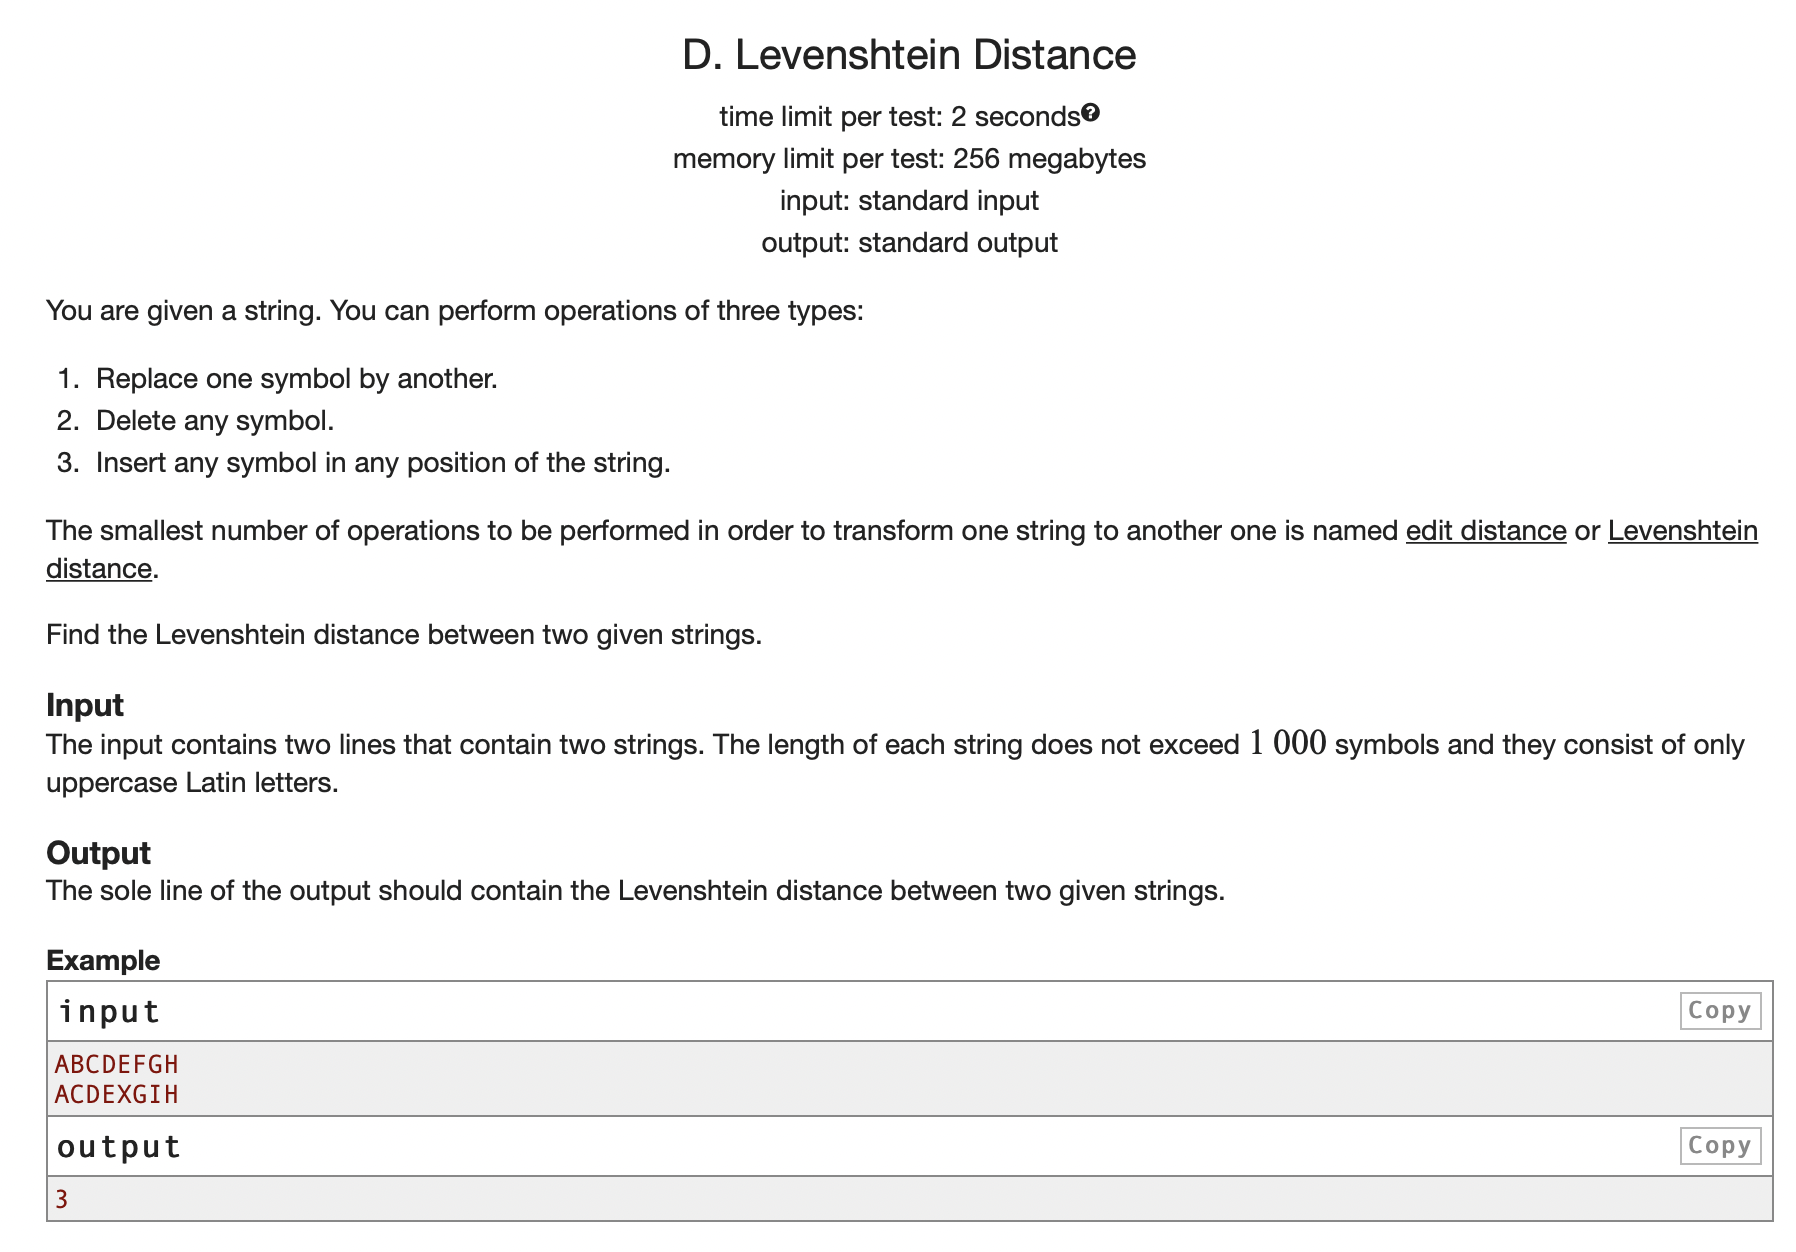

In [80]:
def _init_length_field(string_1, string_2):
    length_field = [[0] * (len(string_2) + 1) for _ in range(len(string_1) + 1)]

    for i in range(len(string_1) + 1):
        length_field[i][0] = i
    for i in range(len(string_2) + 1):
        length_field[0][i] = i
    return length_field


def get_levenshtein_distance(string_1, string_2):
    len_string_1 = len(string_1)
    len_string_2 = len(string_2)
    length_field = _init_length_field(string_1, string_2)

    for i in range(1, len_string_1 + 1):
        for j in range(1, len_string_2 + 1):
            if string_1[i - 1] == string_2[j - 1]:
                length_field[i][j] = length_field[i - 1][j - 1]
            else:
                length_field[i][j] = min(length_field[i - 1][j - 1], 
                                         min(length_field[i - 1][j], length_field[i][j - 1]))
                length_field[i][j] += 1
    return length_field[len_string_1][len_string_2]


string_1 = input()
string_2 = input()
print(get_levenshtein_distance(string_1, string_2))

In [81]:
tests = [
    ('ABCDEFGH', 'ACDEXGIH'),
    ('ABCDEFGH', 'G'),
    ('A', 'B'),
]
expected = [ 
    3,
    7,
    1
]

for test, expect in zip(tests, expected):
    actual = get_levenshtein_distance(*test)
    assert actual == expect

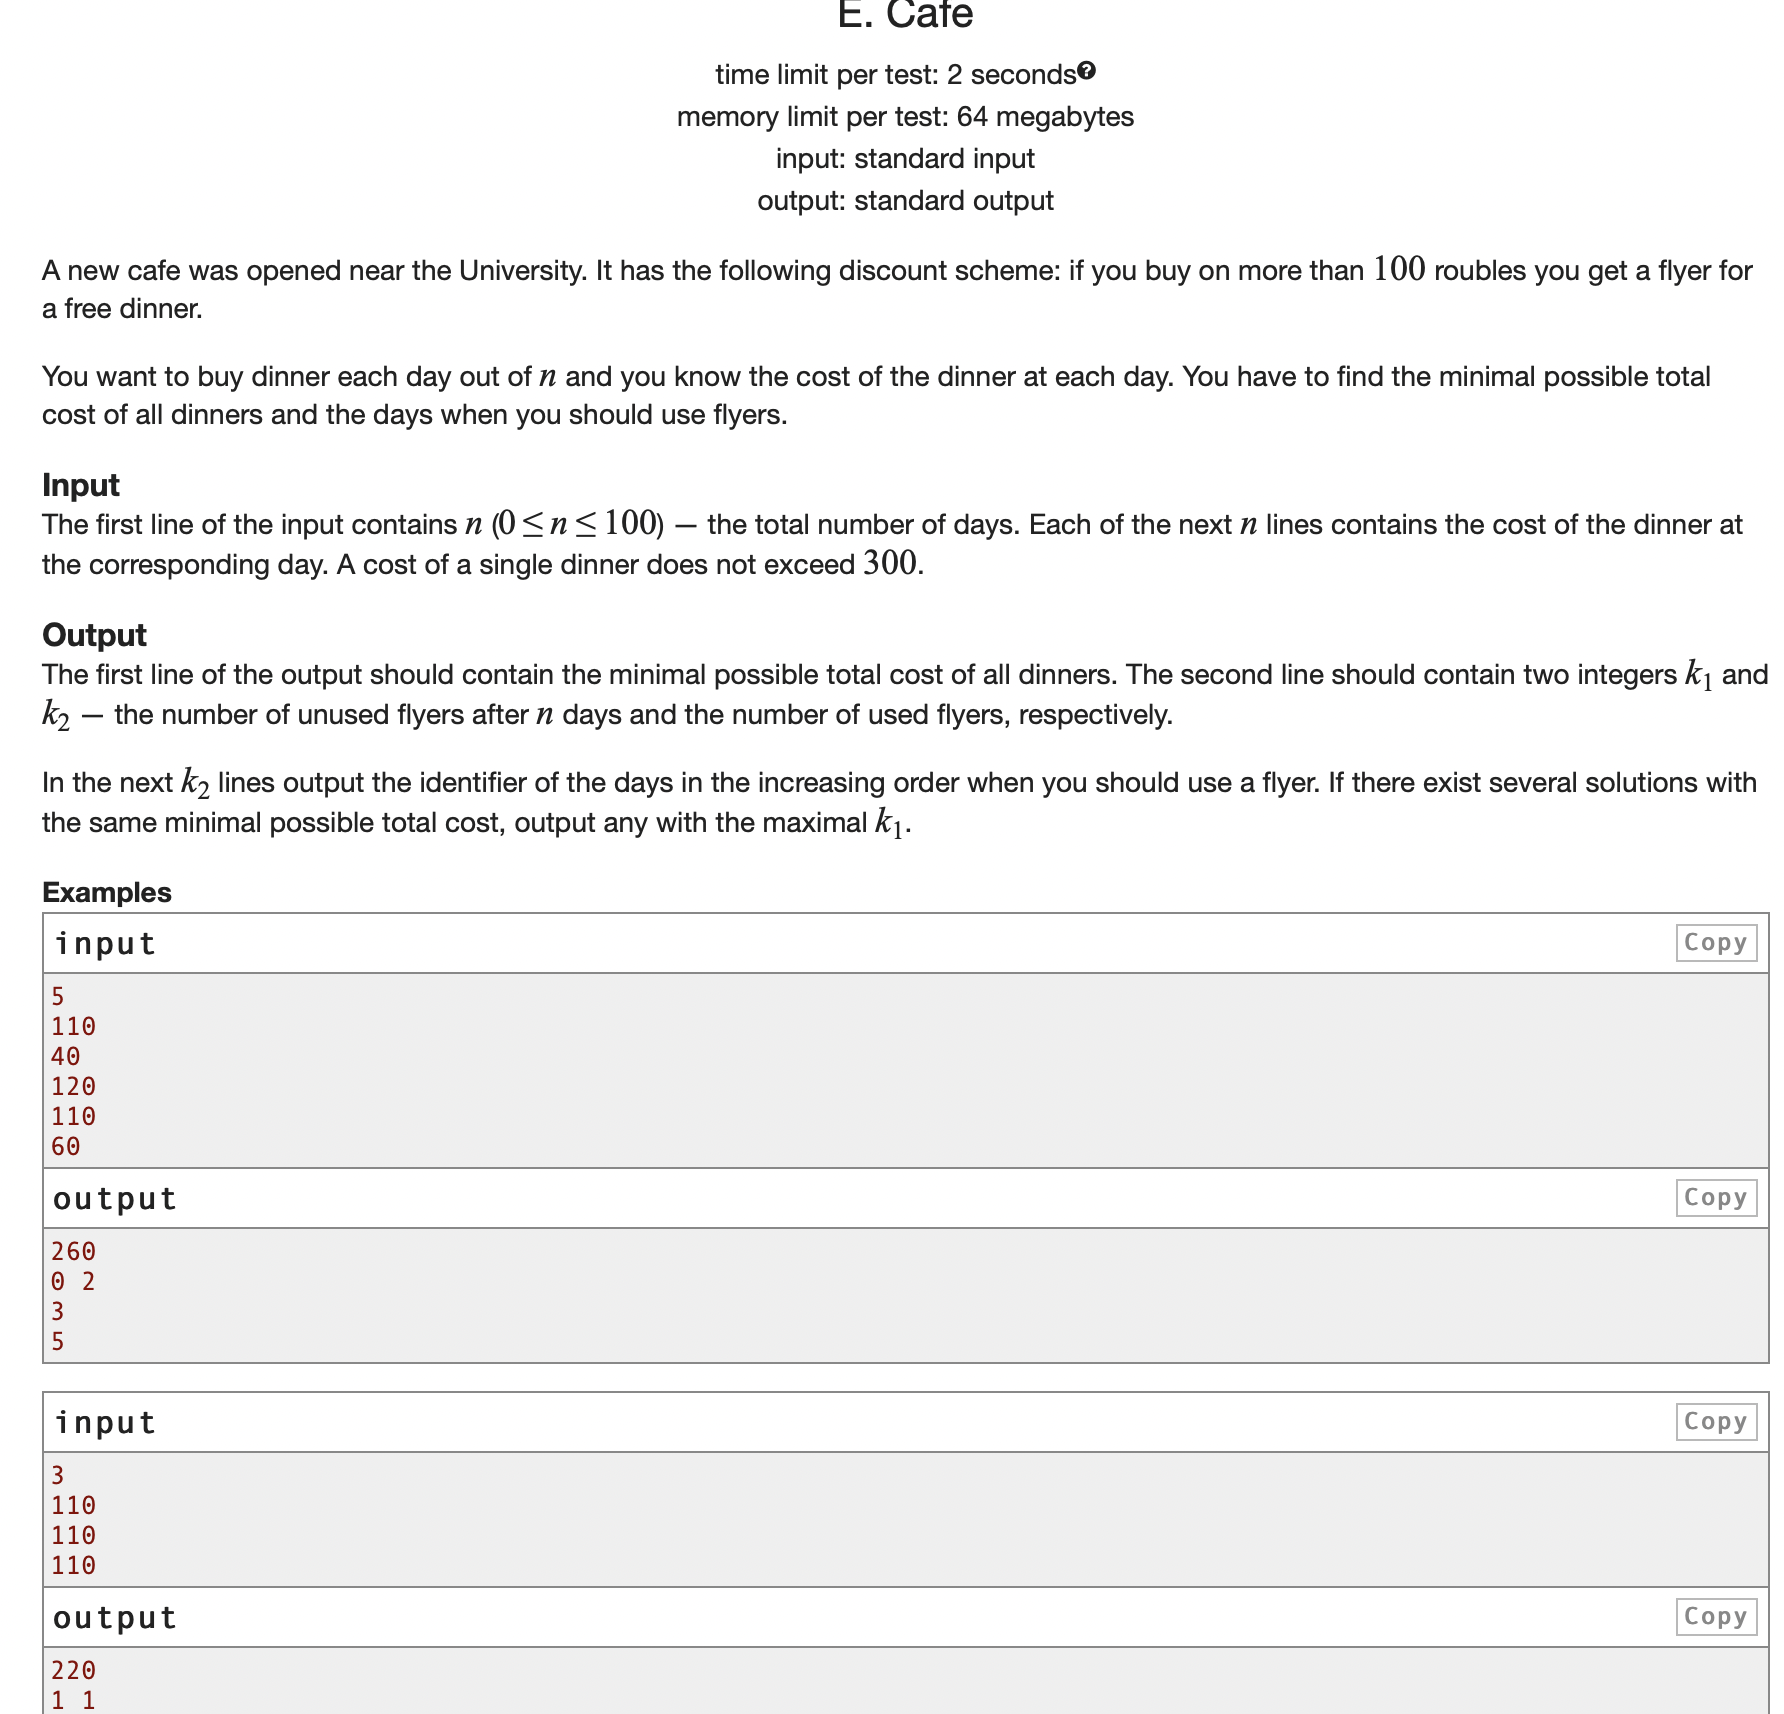

In [331]:
class Cafe:
    FLYER_COST = 100
    def __init__(self, costs, num_days):
        self.costs = costs
        self.num_days = num_days
        self.min_cost_field = self._init_min_cost_field()
        self.flyers_history = [[None] * (num_days + 2) for _ in range(num_days + 1)]

    def _init_min_cost_field(self):
        min_cost_field = [[float('inf')] + [0] * (self.num_days + 1) + [float('inf')]
                          for _ in range(self.num_days + 1)]
        for j in range(2, self.num_days + 2):
            min_cost_field[0][j] = float('inf')
        return min_cost_field

    def get_min_cost(self):
        min_cost_field = self._init_min_cost_field()
        flyers_history = [[None] * (self.num_days + 2) 
                          for _ in range(self.num_days + 1)]
        for i in range(1, self.num_days + 1):
            for j in range(1, self.num_days + 2):
                if self.costs[i - 1] <= Cafe.FLYER_COST:
                    buy_dinner = min_cost_field[i - 1][j] + self.costs[i - 1]
                    spend_flyer = min_cost_field[i - 1][j + 1]
                    if buy_dinner <= spend_flyer:
                        min_cost_field[i][j] = buy_dinner
                        flyers_history[i][j] = 'unused'
                    else:
                        min_cost_field[i][j] = spend_flyer
                        flyers_history[i][j] = 'spent'
                else:
                    buy_dinner = min_cost_field[i - 1][j - 1] + self.costs[i - 1]
                    spend_flyer = min_cost_field[i - 1][j + 1]
                    if buy_dinner <= spend_flyer:
                        min_cost_field[i][j] = buy_dinner
                        flyers_history[i][j] = 'got'
                    else:
                        min_cost_field[i][j] = spend_flyer
                        flyers_history[i][j] = 'spent'

        min_indx = self._get_min_indx(min_cost_field[-1])
        used_flyers_history = self._get_used_flyers_history(flyers_history, min_indx)
        return min_cost_field[-1][min_indx], min_indx - 1, len(used_flyers_history), used_flyers_history[::-1]

    def _get_min_indx(self, last_day):
        min_ind = 1
        for i in range(1, len(last_day)):
            if last_day[i] <= last_day[min_ind]:
                min_ind = i
        return min_ind

    def _get_used_flyers_history(self, flyers_history, min_indx):
        used_flyers_history = []
        current_flyers = min_indx
        for i in range(self.num_days, 0, -1):
            if flyers_history[i][current_flyers] == 'got':
                current_flyers -= 1
            elif flyers_history[i][current_flyers] == 'spent':
                current_flyers += 1
                used_flyers_history.append(i)
        return used_flyers_history


n = int(input())
arr = [int(input()) for _ in range(n)]
result = Cafe(arr, n).get_min_cost()
print(result[0])
print(result[1], result[2])
print(*result[3], sep='\n')

5
110
40
120
110
60
260
0 2
3
5


In [332]:
tests = [
    ([110, 40, 120, 110, 60], 5),
    ([110, 110, 110], 3),
    ([], 0),
    ([90], 1),
    ([110], 1),
    ([110, 90], 2),
    ([90, 110], 2),
]
expected = [ 
    (260, 0, 2, [3, 5]),
    (220, 1, 1, [2]),
    (0, 0, 0, []),
    (90, 0, 0, []),
    (110, 1, 0, []),
    (110, 0, 1, [2]),
    (200, 1, 0, [])
]

for test, expect in zip(tests, expected):
    cafe = Cafe(*test)
    for actual, exp in zip(cafe.get_min_cost(), expect):
        assert actual == exp